# **Bioinformatics Project - Computational Drug Discovery [Part III ] Regression Models with Random Forest**

Nusrat Jahan

In this Jupyter notebook, we will be building a real-life **data science project**, we will be building a machine learning model using the ChEMBL bioactivity data.

### Here WE DEVELOPED A VERY STARIGHT FORWARD RANDOM FOREST MODEL With PUBCHEM Finger Print

In **Part III **, we will be building a regression model of ER-alpha inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [ ]:
df_AP2DFC = pd.read_csv('/content/ERA_bioactivity_data_pIC50_AP2DFC.csv')
df_AP2DFC

,APC2D1_C_C,APC2D1_C_N,APC2D1_C_O,APC2D1_C_S,APC2D1_C_P,APC2D1_C_F,APC2D1_C_Cl,APC2D1_C_Br,APC2D1_C_I,APC2D1_C_B,...,APC2D10_I_B,APC2D10_I_Si,APC2D10_I_X,APC2D10_B_B,APC2D10_B_Si,APC2D10_B_X,APC2D10_Si_Si,APC2D10_Si_X,APC2D10_X_X,pIC50
0,27.0,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.602060
1,25.0,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.124939
2,27.0,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.408935
3,27.0,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.130768
4,24.0,5.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.309804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,30.0,2.0,2.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.119186
1468,29.0,7.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.494850
1469,26.0,3.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000
1470,39.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.744727


In [ ]:
df_AP2DFP = pd.read_csv('/content/ERA_bioactivity_data_pIC50_AP2DFP.csv')
df_AP2DFP

,AD2D1,AD2D2,AD2D3,AD2D4,AD2D5,AD2D6,AD2D7,AD2D8,AD2D9,AD2D10,...,AD2D772,AD2D773,AD2D774,AD2D775,AD2D776,AD2D777,AD2D778,AD2D779,AD2D780,pIC50
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.602060
1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.124939
2,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.408935
3,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.130768
4,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.309804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,1,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,9.119186
1468,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.494850
1469,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.000000
1470,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.744727


In [ ]:
df_MACCS = pd.read_csv('/content/ERA_bioactivity_data_pIC50_MACCS.csv')
df_MACCS

,MACCSFP1,MACCSFP2,MACCSFP3,MACCSFP4,MACCSFP5,MACCSFP6,MACCSFP7,MACCSFP8,MACCSFP9,MACCSFP10,...,MACCSFP158,MACCSFP159,MACCSFP160,MACCSFP161,MACCSFP162,MACCSFP163,MACCSFP164,MACCSFP165,MACCSFP166,pIC50
0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,0,8.602060
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,0,8.124939
2,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,0,8.408935
3,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,0,8.130768
4,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,0,6.309804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,0,0,0,0,0,0,0,1,0,0,...,1,0,1,1,1,1,1,1,0,9.119186
1468,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,8.494850
1469,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,0,5.000000
1470,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,8.744727


In [ ]:
df_PubChem = pd.read_csv('/content/ERA_bioactivity_data_pIC50_pubchem_fp.csv')
df_PubChem

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.602060
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.124939
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.408935
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.130768
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.309804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.119186
1468,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.494850
1469,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
1470,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.744727


## **3. Input features**
The ***ER-alpha-inhibitors *** 

AP2DFC data set contains 780 input features and 1 output variable (pIC50 values).

AP2DFP data set contains 780 input features and 1 output variable (pIC50 values).

MACCS data set contains 166 input features and 1 output variable (pIC50 values).

PubChem data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [ ]:
# we will keep the fingerprint data and will use to predict pIC50 values
X_pubchem = df_PubChem.drop('pIC50', axis=1)
X_pubchem

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1468,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1469,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1470,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [ ]:
#This is the experimental pIC50 values which will be used to compare with predicted pIC50
Y_pubchem = df_PubChem.pIC50
Y_pubchem

0       8.602060
1       8.124939
2       8.408935
3       8.130768
4       6.309804
          ...   
1467    9.119186
1468    8.494850
1469    5.000000
1470    8.744727
1471    8.397940
Name: pIC50, Length: 1472, dtype: float64

### **3.3. Let's examine the data dimension**

In [12]:
X_pubchem.shape

(1472, 881)

In [13]:
Y_pubchem.shape

(1472,)

### **3.4. Remove low variance features**

In [19]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.16):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X_pubchem = remove_low_variance(X_pubchem, threshold=0.1)
X_pubchem

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP33,PubchemFP143,...,PubchemFP784,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP803,PubchemFP804,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP860
0,1,1,1,1,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
1,1,1,1,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1,1,1,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,1,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,1,1,0,1,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,1,0,1,1,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
1468,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1469,1,1,1,1,1,1,1,0,0,1,...,1,0,1,0,0,0,1,1,1,0
1470,1,0,1,1,0,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
X_pubchem.shape

(1472, 198)

## **4. Data split (80/20 ratio)**

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pubchem, Y_pubchem, test_size=0.2)

In [22]:
X_train.shape, Y_train.shape

((1177, 198), (1177,))

In [23]:
X_test.shape, Y_test.shape

((295, 198), (295,))

## **5. Building a Regression Model using Random Forest**

In [24]:
import numpy as np
np.random.seed(400)
model = RandomForestRegressor(n_estimators=400)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.6028248328776311

In [25]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

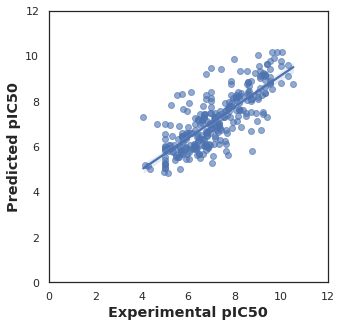

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.6})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show